# <font style="color:black">Getting Started with Images</font>

This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

- Reading an image
- Check image attributes like datatype and shape
- Matrix representation of an image in Numpy
- Color Images and splitting/merging image channels
- Displaying images using matplotlib
- Saving images


OpenCV (Open Source Computer Vision Library) is an open-source computer vision and image processing library that provides a wide range of functionalities for processing and analyzing digital images and videos. It was originally developed by Intel and later maintained by the OpenCV community. OpenCV is written in C++ and has bindings for various programming languages, including Python, Java, and MATLAB, making it accessible to developers across different platforms.

OpenCV offers a comprehensive set of tools and algorithms for various computer vision tasks, including:

1. **Image Processing**: OpenCV provides functions for basic image processing operations such as reading and writing images, resizing, cropping, rotating, and converting between different color spaces (e.g., RGB, grayscale, HSV).

2. **Feature Detection and Description**: OpenCV includes algorithms for detecting and describing keypoints and local features in images, such as corners, blobs, and edges. It provides implementations of popular algorithms such as SIFT (Scale-Invariant Feature Transform), SURF (Speeded Up Robust Features), and ORB (Oriented FAST and Rotated BRIEF).

3. **Object Detection and Tracking**: OpenCV supports object detection and tracking tasks using various techniques, including Haar cascades, HOG (Histogram of Oriented Gradients), and deep learning-based approaches such as YOLO (You Only Look Once) and SSD (Single Shot Multibox Detector).

4. **Image Segmentation**: OpenCV offers tools for segmenting images into meaningful regions or objects based on color, texture, or other features. It includes algorithms for thresholding, contour detection, and region-based segmentation.

5. **Camera Calibration and 3D Reconstruction**: OpenCV provides utilities for calibrating camera parameters, stereo vision, and reconstructing 3D scenes from multiple images. These tools are essential for tasks such as 3D reconstruction, augmented reality, and robotics.

6. **Deep Learning Integration**: OpenCV seamlessly integrates with deep learning frameworks such as TensorFlow, PyTorch, and Keras, allowing developers to deploy and run pre-trained deep learning models for various computer vision tasks.

OpenCV is widely used in academia, research, and industry for a variety of applications, including image and video processing, robotics, surveillance, augmented reality, medical imaging, and autonomous vehicles. Its extensive documentation, large user community, and cross-platform support make it one of the most popular and powerful libraries for computer vision development.


## <font style="color:black">Import Libraries</font>


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## <font style="color:black">Download Assets</font>


The `download_and_unzip(...)` is used to download and extract the notebook assests.


In [2]:
import os


def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
import os

URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

The opencv_bootcamp_assets_NB1.zip` file includes also contains the additional **display_image.py** python script.


## <font style="color:black">Display Image Directly</font>

We will use the following as our sample images. We will use the ipython image function to load and display the image.


In [16]:
# Display 18x18 pixel image.
Image(filename="../images/checkerboard_18x18.png")

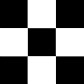

In [7]:
# Display 84x84 pixel image.
Image(filename="../images/checkerboard_84x84.jpg")

# <font style="color:black">Reading images using OpenCV</font>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>

```python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:

1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**

1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.

### <font color="green">OpenCV Documentation</font>

1. **`Imread`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>


In [13]:
# Read image as gray scale.
cb_img_gray = cv2.imread("../images/checkerboard_18x18.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img_gray)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [30]:
# Read image as gray scale.
cb_img_col = cv2.imread("../images/checkerboard_18x18.png", 1)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img_col[0])

[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]]


## Display Image attributes


In [17]:
# print the size  of image
print("Image size (H, W) is:", cb_img_gray.shape)

# print data-type of image
print("Data type of image is:", cb_img_gray.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


In [18]:
# print the size  of image
print("Image size (H, W) is:", cb_img_col.shape)

# print data-type of image
print("Data type of image is:", cb_img_col.dtype)

Image size (H, W) is: (18, 18, 3)
Data type of image is: uint8


## Display Images using Matplotlib


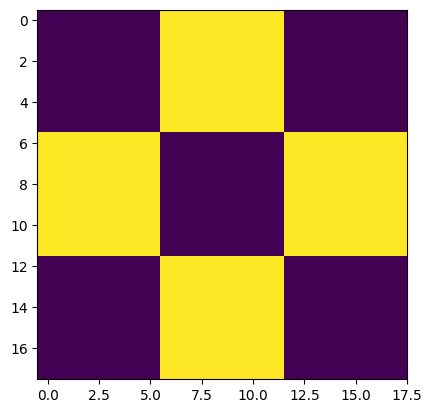

In [20]:
# Display image.
import matplotlib.pyplot as plt

plt.imshow(cb_img_gray)

### What happened?

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.


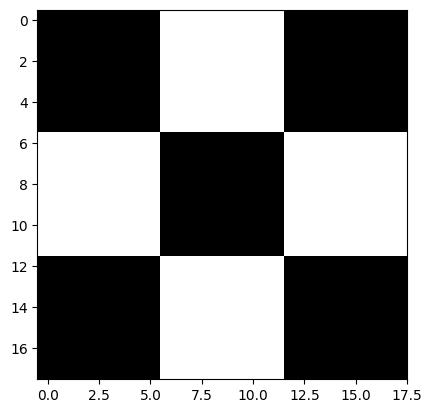

In [ ]:
# Set color map to gray scale for proper rendering.
import matplotlib.pyplot as plt

plt.imshow(cb_img, cmap="gray")

## Another example


[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

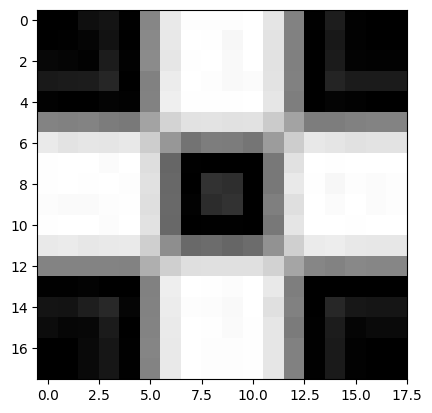

In [35]:
# Read image as gray scale.
import matplotlib.pyplot as plt

cb_img_fuzzy = cv2.imread("../images/checkerboard_fuzzy_18x18.jpg", 0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap="gray")

In `plt.imshow()` function from Matplotlib, the `cmap` parameter is used to specify the colormap that will be applied when visualizing an image.

When you set `cmap="gray"`, it means that you are specifying the grayscale colormap. Grayscale colormap represents the intensity values of an image using a range of gray colors, where darker shades of gray correspond to lower intensity values and lighter shades correspond to higher intensity values. This colormap is commonly used for visualizing grayscale images where each pixel has a single intensity value, typically ranging from 0 (black) to 255 (white).

For example, if you have an image `cb_img_fuzzy` that is grayscale (i.e., it has only one channel representing intensity values), using `cmap="gray"` will display the image with grayscale colormap, showing the intensity variations across the image using different shades of gray.

In Matplotlib's `imshow()` function, the `cmap` parameter specifies the colormap to be used when displaying an image. There are various colormaps available in Matplotlib, and you can specify the colormap using either its name or a Colormap object. Additionally, you can control the normalization of the colormap using the `norm` parameter. Here are the different keyword arguments for `cmap`:

1. **Name of a Colormap**: You can specify the name of a predefined colormap as a string. Some commonly used colormaps include:

   - `"viridis"`
   - `"plasma"`
   - `"inferno"`
   - `"magma"`
   - `"cividis"`
   - `"gray"`
   - `"hot"`
   - `"cool"`
   - `"spring"`
   - `"summer"`
   - `"autumn"`
   - `"winter"`
   - `"bone"`
   - `"jet"`
   - `"rainbow"`
   - `"hsv"`

2. **Colormap Object**: You can also specify a Colormap object directly. This allows you to create custom colormaps or use predefined colormaps with custom normalization. For example:

   - `cmap=plt.cm.viridis`
   - `cmap=plt.cm.get_cmap("hot")`

3. **None**: If `cmap` is set to `None`, the default colormap (usually `"viridis"`) will be used.

Additionally, there are some other keyword arguments related to colormaps:

- **`norm`**: This parameter allows you to specify the normalization of the colormap. It can be used to map the image data to the range expected by the colormap. Some commonly used normalization classes include `matplotlib.colors.Normalize` and `matplotlib.colors.LogNorm`.

- **`vmin` and `vmax`**: These parameters specify the minimum and maximum values of the colormap's input data range. Values outside this range will be clipped.

- **`alpha`**: This parameter specifies the transparency of the colormap, ranging from 0 (fully transparent) to 1 (fully opaque).

- **`bytes`**: This parameter specifies whether to interpret the input data as bytes (True) or floats (False). It affects how the input data is mapped to the colormap.

These are some of the key parameters related to colormaps in Matplotlib's `imshow()` function. Depending on your specific visualization needs, you can use these parameters to customize the appearance of your image.


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


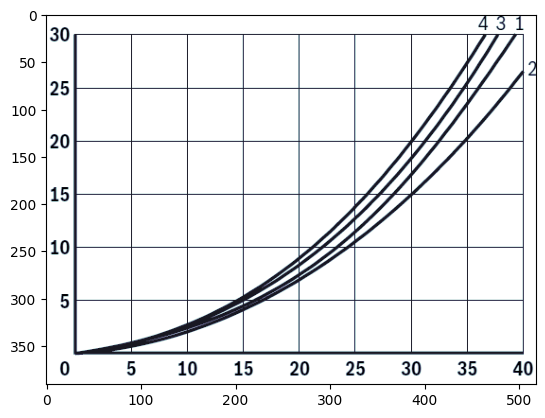

In [45]:
# Read image as gray scale.
import matplotlib.pyplot as plt

chart = cv2.imread("../images/chart.PNG", 0)

# print image
print(chart)

# Display image.
plt.imshow(chart, cmap="bone")

In [37]:
# print the size  of image
print("Image size (H, W) is:", chart.shape)

# print data-type of image
print("Data type of image is:", chart.dtype)

Image size (H, W) is: (391, 518)
Data type of image is: uint8


## Working with Color Images

Until now, we have been using gray scale images in our discussion. Let us now discuss color images.


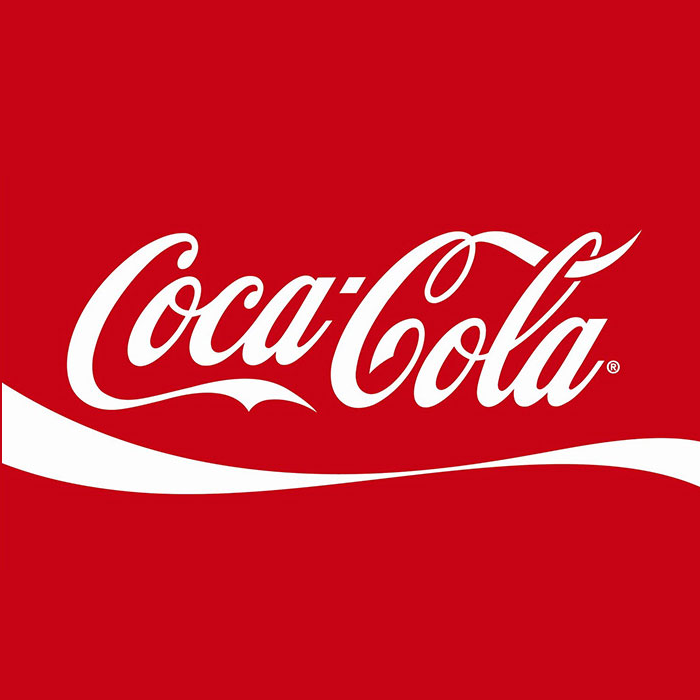

In [46]:
# Read and display Coca-Cola logo.
Image("../images/coca-cola-logo.png")

## Read and display color image

Let us read a color image and check the parameters. Note the image dimension.


In [48]:
# Read in image
coke_img = cv2.imread("../images/coca-cola-logo.png", 1)

# print the size  of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


## Display the Image


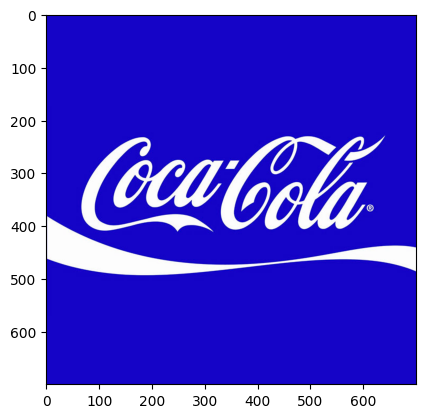

In [49]:
import matplotlib.pyplot as plt

plt.imshow(coke_img)
#  What happened?

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.


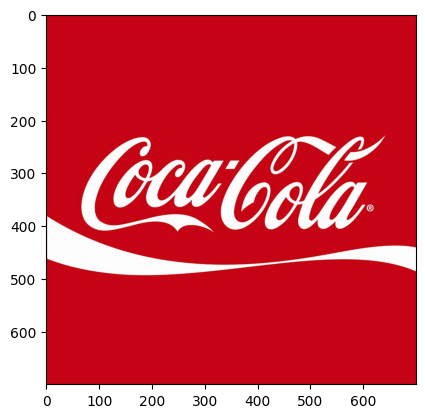

In [ ]:
import matplotlib.pyplot as plt

coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

## Splitting and Merging Color Channels

- **`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

- **`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

<a href="https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a" target="_blank">Documentation link</a>


In [1]:
# Split the image into the B,G,R components
import matplotlib.pyplot as plt

img_NZ_bgr = cv2.imread("../images/New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")
plt.subplot(142)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")
plt.subplot(143)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

NameError: name 'cv2' is not defined

## Converting to different Color Spaces

**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

2. `code` color space conversion code (see ColorConversionCodes).

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`cv2.cvtColor`**: <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab" target="_blank">Documentation link</a>

2. **`ColorConversionCodes`**: <a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0" target="_blank">Documentation link</a>


The `cv2.cvtColor()` function in OpenCV is used to convert an image from one color space to another. It allows you to perform color space conversions such as RGB to grayscale, RGB to HSV, RGB to LAB, and many others. This function is particularly useful in image processing tasks where different color spaces offer different advantages.

Here's the general syntax of the `cv2.cvtColor()` function:

```python
cv2.cvtColor(src, code[, dst[, dstCn]])
```

- `src`: This is the input image.
- `code`: This is the color space conversion code that specifies the conversion to be performed. It can be one of the following:
  - `cv2.COLOR_BGR2GRAY`: Convert from BGR (Blue, Green, Red) to grayscale.
  - `cv2.COLOR_BGR2RGB`: Convert from BGR to RGB.
  - `cv2.COLOR_BGR2HSV`: Convert from BGR to HSV (Hue, Saturation, Value).
  - `cv2.COLOR_BGR2LAB`: Convert from BGR to LAB (CIELAB).
  - `cv2.COLOR_BGR2XYZ`: Convert from BGR to XYZ.
  - `cv2.COLOR_BGR2YUV`: Convert from BGR to YUV.
  - `cv2.COLOR_BGR2HLS`: Convert from BGR to HLS (Hue, Lightness, Saturation).
  - `cv2.COLOR_BGR2LUV`: Convert from BGR to LUV.
  - ...and many more. You can find a full list of supported conversions in the OpenCV documentation.
- `dst`: This is an optional output image. If provided, the result of the conversion will be stored here.
- `dstCn`: This is the number of channels in the destination image. It is typically set to 0, which means that the number of channels is automatically determined based on the code parameter.

Here's an example of using `cv2.cvtColor()` to convert an image from BGR to grayscale:

```python
import cv2

# Read an image in BGR format
bgr_image = cv2.imread('image.jpg')

# Convert BGR image to grayscale
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
```

In this example, `bgr_image` is converted from BGR to grayscale using `cv2.cvtColor()` with the `cv2.COLOR_BGR2GRAY` conversion code, and the result is stored in `gray_image`.


### Changing from BGR to RGB


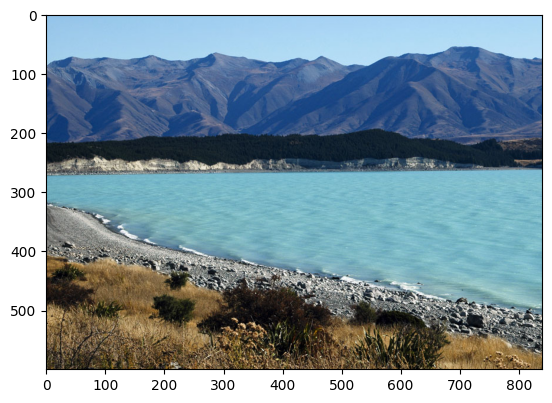

In [55]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
import matplotlib.pyplot as plt

img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space


HSV stands for Hue, Saturation, and Value, which are three components of a color model used in image processing and computer vision. The HSV color model represents colors based on their hue, saturation, and brightness, providing an alternative way to describe and manipulate color information compared to the more commonly used RGB (Red, Green, Blue) color model.

Here's a brief overview of each component in the HSV color model:

1. **Hue (H)**: Hue represents the dominant wavelength of a color and corresponds to its perceived color (e.g., red, green, blue). In the HSV color model, hue is represented as an angle ranging from 0 to 360 degrees (or 0 to 1 in some implementations), where 0 degrees corresponds to red, 120 degrees corresponds to green, and 240 degrees corresponds to blue. Other colors lie between these primary hues in the color wheel.

2. **Saturation (S)**: Saturation represents the intensity or purity of a color and describes how vivid or dull the color appears. In the HSV color model, saturation is typically represented as a percentage ranging from 0% (completely unsaturated, grayscale) to 100% (fully saturated, pure color). Higher saturation values result in more vivid and intense colors, while lower saturation values result in more muted or pastel-like colors.

3. **Value (V)**: Value represents the brightness or lightness of a color and describes how light or dark the color appears. In the HSV color model, value is typically represented as a percentage ranging from 0% (completely black) to 100% (fully white). A value of 50% corresponds to the original color with no change in brightness, while values greater than 50% lighten the color and values less than 50% darken the color.

The HSV color model is often used in image processing tasks such as color segmentation, color-based object detection, and color manipulation because it separates the color information from the intensity information (brightness), making it easier to work with and manipulate specific aspects of color in an image. Additionally, HSV color space is more intuitive for many applications that involve human perception of color, as it closely matches how humans perceive and describe colors in the real world.


## Hue effects on image processing

The hue component of the HSV color model represents the dominant wavelength of a color, determining its perceived color. Changing the hue value of an image affects the overall color appearance by shifting the colors along the color spectrum. Here's how hue affects the image:

1. **Color Shift**: Adjusting the hue value changes the color of each pixel in the image while keeping its brightness and saturation constant. For example, shifting the hue of a red pixel towards green will change its color to orange, yellow, and eventually green.

2. **Color Variation**: By modifying the hue, you can create variations of the original colors in the image. This allows you to produce artistic effects, create color harmonies, or simulate different lighting conditions.

3. **Color Correction**: Hue adjustments are often used in color correction and color grading to correct color casts or white balance issues in images. For example, you can shift the hue of an image to compensate for an unwanted color tint or to match the color temperature of the scene.

4. **Color Enhancement**: Changing the hue can enhance certain colors in the image, making them more visually appealing or emphasizing specific elements. For example, you can intensify the blue tones in a landscape image to make the sky appear more vibrant.

5. **Creative Effects**: Adjusting the hue can also be used for creative purposes to stylize or transform the appearance of an image. For example, you can create surreal or psychedelic effects by shifting the hue of the entire image or specific color regions.

Overall, hue manipulation provides a powerful tool for controlling the color appearance of an image, allowing you to achieve various visual effects and convey different moods or atmospheres in your photographs or digital artworks.


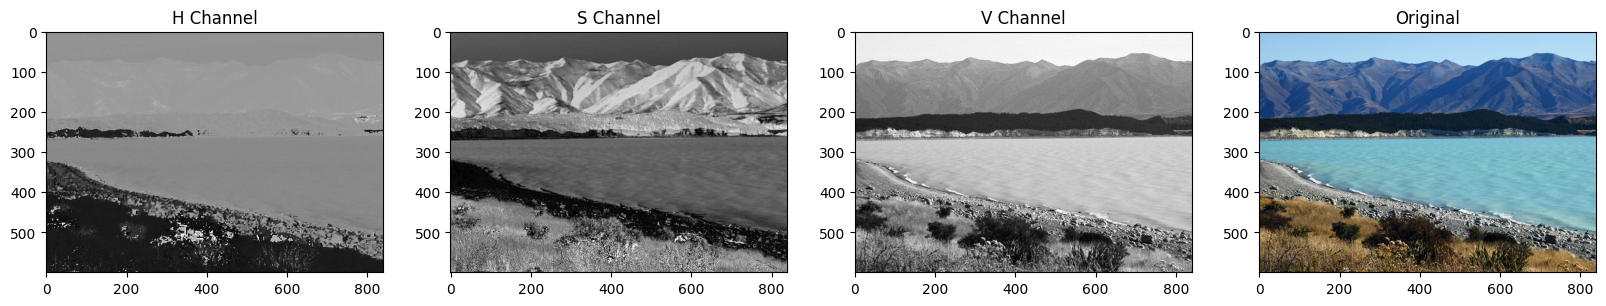

In [56]:
import matplotlib.pyplot as plt

img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h, s, v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

## Modifying individual Channel


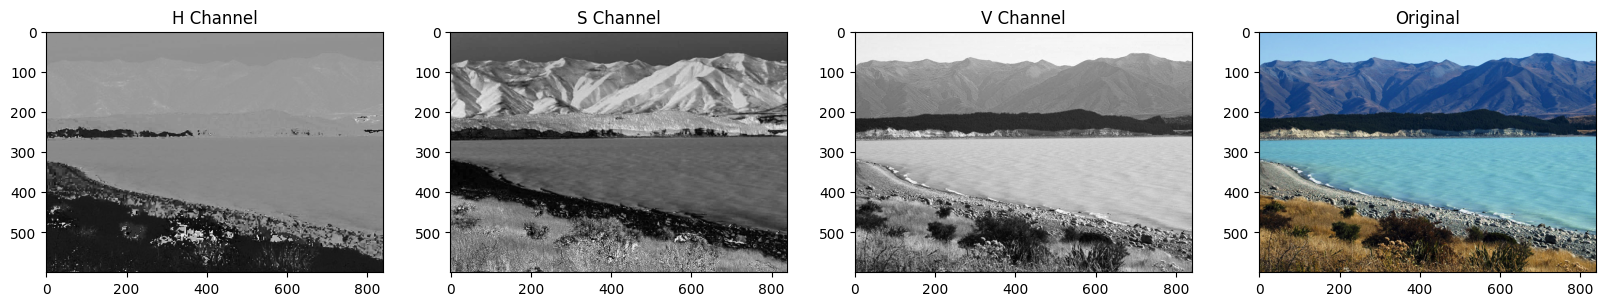

In [62]:
import matplotlib.pyplot as plt

h_new = h + 10
s_new = s + 10
img_NZ_merged = cv2.merge((h, s_new, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path.

2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`Imwrite`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce" target="_blank">Documentation link</a>

2. **`ImwriteFlags`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac" target="_blank">Documentation link</a>


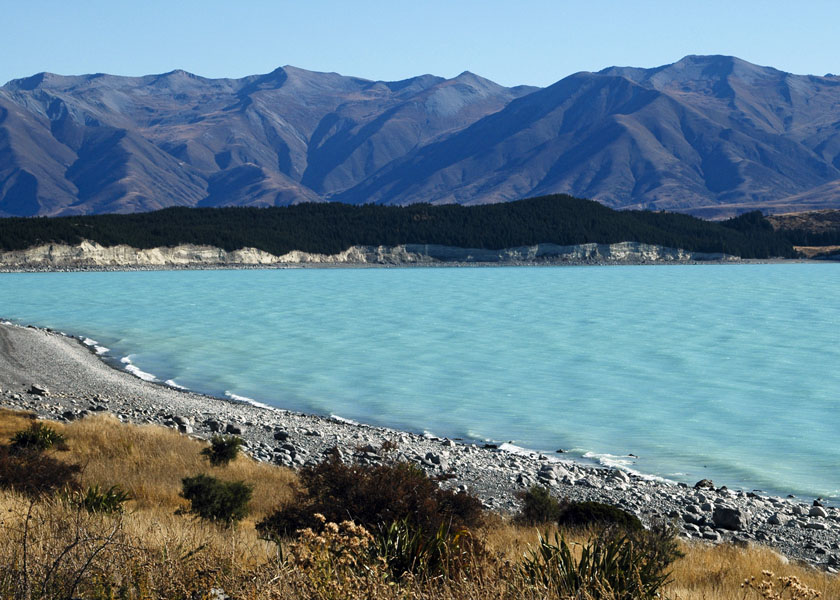

In [ ]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename="New_Zealand_Lake_SAVED.png")

In [ ]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W) is: (600, 840)


# Basic Image Manipulations

In this notebook we will cover how to perform image transformations including:

- Accessing and manipulating images pixels
- Image resizing
- Cropping
- Flipping


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## <font style="color:black">Download Assets</font>


The `download_and_unzip(...)` is used to download and extract the notebook assests.


In [ ]:
import os


def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
import os

URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

### <font style="color:rgb(8,133,37)">Original checkerboard image</font>


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

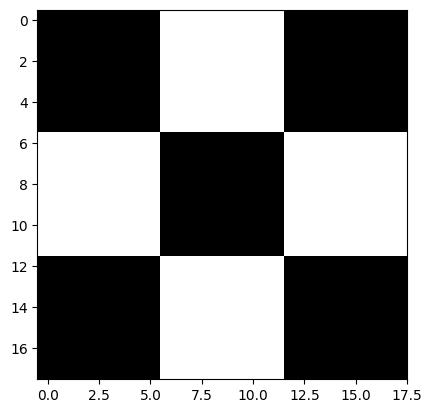

In [ ]:
# Read image as gray scale.
import matplotlib.pyplot as plt

cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

## Accessing Individual Pixels

Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.


In [ ]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

0
255


## <font style="color:black">Modifying Image Pixels</font>

We can modify the intensity values of pixels in the same manner as described above.


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

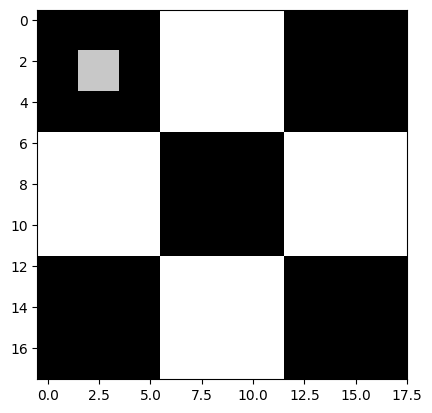

In [ ]:
import matplotlib.pyplot as plt

cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# Same as above

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

# Cropping Images

Cropping an image is simply achieved by selecting a specific (pixel) region of the image.


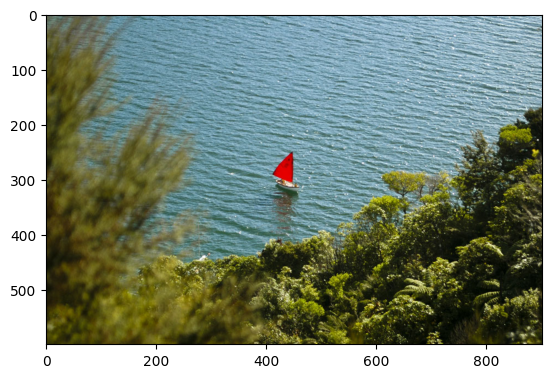

In [ ]:
import matplotlib.pyplot as plt

img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

### <font color="green">Crop out the middle region of the image</font>


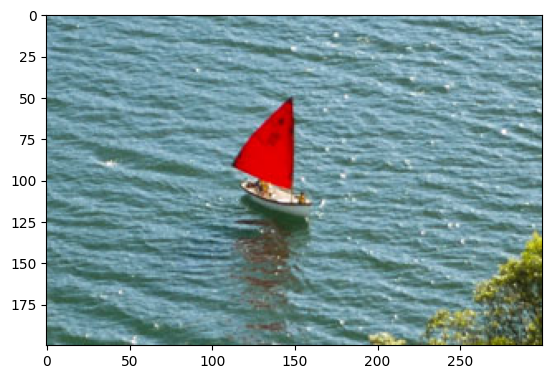

In [ ]:
import matplotlib.pyplot as plt

cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:

1. `src`: input image

2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Documentation link</a>


### <font color="green"> Method 1: Specifying Scaling Factor using fx and fy


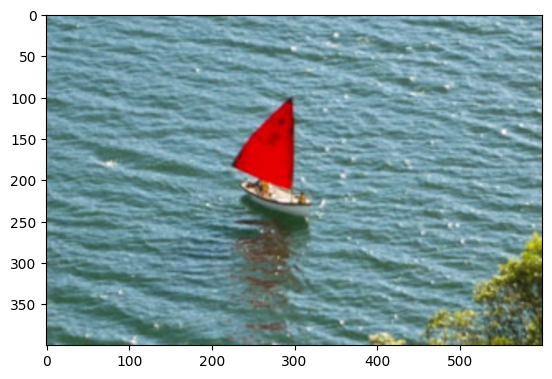

In [ ]:
import matplotlib.pyplot as plt

resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### <font color="green">Medthod 2: Specifying exact size of the output image</font>


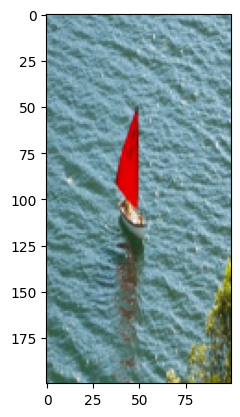

In [ ]:
import matplotlib.pyplot as plt

desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### <font color="green">Resize while maintaining aspect ratio</font>


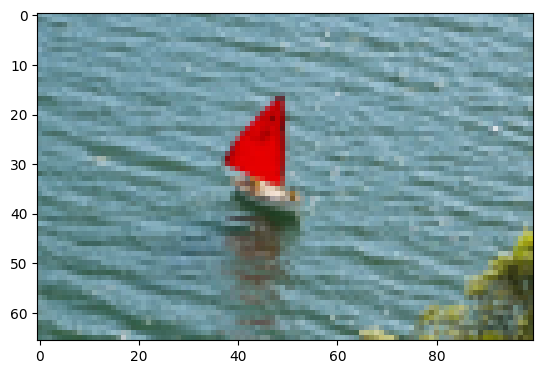

In [ ]:
# Method 2: Using 'dsize'
import matplotlib.pyplot as plt

desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### <font style="color:rgb(8,133,37)">Let's actually show the (cropped) resized image.</font>


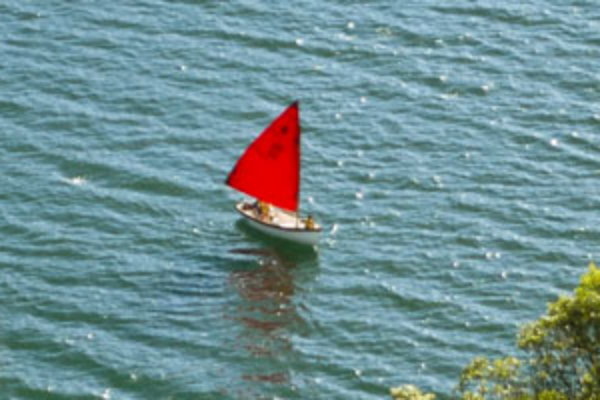

In [ ]:
# Swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

# Save resized image to disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
Image(filename="resized_cropped_region_2x.png")

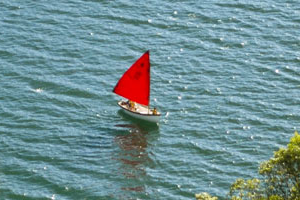

In [ ]:
# Swap channel order
cropped_region = cropped_region[:, :, ::-1]

# Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
Image(filename="cropped_region.png")

# Flipping Images

The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:

1. `src`: input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Documentation link</a>


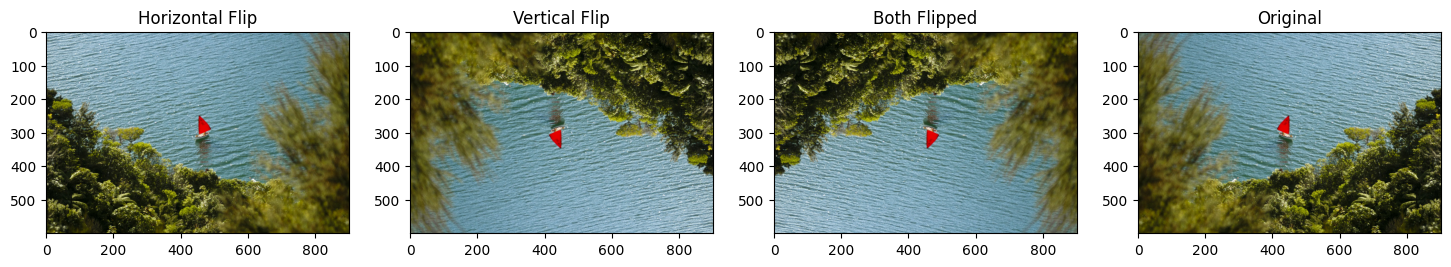

In [ ]:
import matplotlib.pyplot as plt

img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");

## Thank You!
